# PRCP-1024-TexasSalaryPrediction

## Problem Statement
**Task 1**:-Prepare a complete data analysis report on the given data.

**Task 2**:- Create a predictive model which will help theTexas state government
team to know the payroll information of employees of the state of Texas.

**Task 3**:-
1. Who are the outliers in the salaries?
2. What departments/roles have the biggest wage disparities between
managers and employees?
3. Have salaries and total compensations for some roles/ departments/
head-count changed over time?





# Dataset Overview

## Attribute Information :

1. AGENCY: Unique identifier for the agency employing the individual.
2. AGENCY NAME: Name of the employing agency.
3. LAST NAME: Last name of the individual.
4. FIRST NAME: First name of the individual.
5. MI: Middle initial of the individual, if available.
6. CLASS CODE: Code representing the job classification.
7. CLASS TITLE: Title or position associated with the classification code.
8. ETHNICITY: Ethnicity category of the individual.
9. GENDER: Gender of the individual.
10. STATUS: Employment status, indicating position type (e.g., full-time, part-time).
11. HRLY RATE: Hourly rate of pay for the individual.
12. HRS PER WK: Hours worked per week by the individual.
13. MONTHLY: Monthly salary or earnings calculated for the individual.
14. ANNUAL: Annual salary or earnings calculated for the individual.
15. STATE NUMBER: Unique state identifier for the individual.
16. duplicated: Boolean indicating if the entry is duplicated across records.
17. multiple_full_time_jobs: Indicator if the individual has multiple full-time roles.
18.  combined_multiple_jobs: Indicator if multiple jobs are 19. combined for salary purposes.
20. summed_annual_salary: Total annual salary combined across multiple jobs, if applicable.
21. hide_from_search: Boolean indicating if the record should be hidden from searches.


















## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
display.max_columns=None


In [ ]:
df=pd.read_csv('/content/salary.csv')
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717.0,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717.0,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115.0,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115.0,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030.0,True,1.0,NaN,NaN,NaN


###### To create a new feature called total_weekly_income as the product of HRLY RATE and HRS PER WK .

In [ ]:
df['Total_weekly_income']=df['HRLY RATE']*df['HRS PER WK']
df.head()
df.drop(['HRLY RATE','HRS PER WK'],axis=1,inplace=True)
df.head(1)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search,Total_weekly_income
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,9545.82,114549.84,127717.0,True,NaN,NaN,131407.08,NaN,2202.8835


#####  To convert an employment date from string format to a datetime format in Python, we can use the pd.to_datetime() function from the pandas library. This is a best practice to ensure consistent date representation, making it easier to perform operations like sorting, filtering by date, or calculating time intervals.



In [ ]:
# fetching date and day. year
df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'], errors='coerce')


## Task 3:

#### 3.1 Who are the outliers in the salaries?

<Axes: ylabel='ANNUAL'>

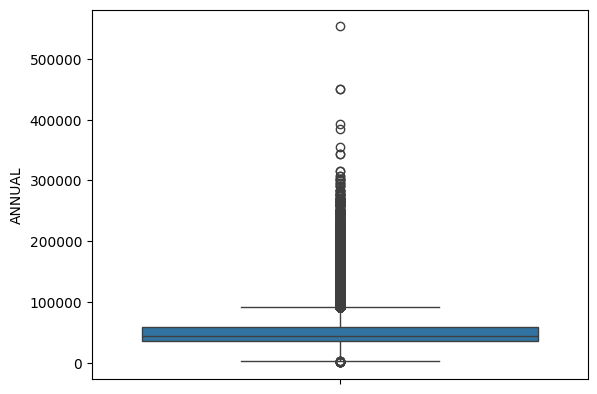

In [ ]:

sns.boxplot(df['ANNUAL'])

In [ ]:
df.loc[df['ANNUAL']>300000, 'STATUS']

,STATUS
14793,ERF - EXEMPT REGULAR FULL-TIME
14800,URF - UNCLASSIFIED REGULAR FULL-TIME
14814,URF - UNCLASSIFIED REGULAR FULL-TIME
15041,ERF - EXEMPT REGULAR FULL-TIME
15078,URF - UNCLASSIFIED REGULAR FULL-TIME
15154,URF - UNCLASSIFIED REGULAR FULL-TIME
15283,URF - UNCLASSIFIED REGULAR FULL-TIME
15349,URF - UNCLASSIFIED REGULAR FULL-TIME
15525,URF - UNCLASSIFIED REGULAR FULL-TIME
15539,URF - UNCLASSIFIED REGULAR FULL-TIME


In [ ]:

df.loc[df['ANNUAL']>300000, 'STATUS'].value_counts()

,count
STATUS,
URF - UNCLASSIFIED REGULAR FULL-TIME,9
ERF - EXEMPT REGULAR FULL-TIME,6


To identify outliers in salary based on the STATUS feature, I ve used a boxplot and found that salaries exceeding 30,000 are outliers. Using the .loc function, I specifically identified 15 employees with STATUS values of "UNCLASSIFIED REGULAR FULL-TIME" and "EXEMPT REGULAR FULL-TIME" whose salaries exceed this threshold. Here’s how this process can be clearly explained:

#### 3.2 What departments/roles have the biggest wage disparities between managers and employees?

In [ ]:

df.groupby('CLASS TITLE')['ANNUAL'].mean().sort_values(ascending=False)

,ANNUAL
CLASS TITLE,
CHIEF SCIENTIFIC OFFICER,553500.00
DIRECTOR OF INVESTMENTS,450000.00
PSF CHIEF INVESTMENT OFFICER,384375.00
SENIOR MANAGING DIRECTOR,319000.00
EXECUTIVE DIRECTOR FOR ERS,316116.96
...,...
RESIDENT SPECIALIST I,15229.96
"COMMISS, CANADIAN RIVER COMPAC",11036.16
"COMMISS, SABINE RIVER COMPACT",8699.16


##### To identify the highest and lowest paid roles, we grouped the data by CLASS TITLE (job roles), calculated the mean salary for each role, and sorted the results in descending order. This revealed that the "CHIEF SCIENTIFIC OFFICER" is the highest-paid role on average, while the "MED TECHNOLOGIST TRAINEE" has the lowest average salary.



##### 3.3 Have salaries and total compensations for some roles/ departments/ head-count changed over time?

<Axes: xlabel='ANNUAL', ylabel='EMPLOY DATE'>

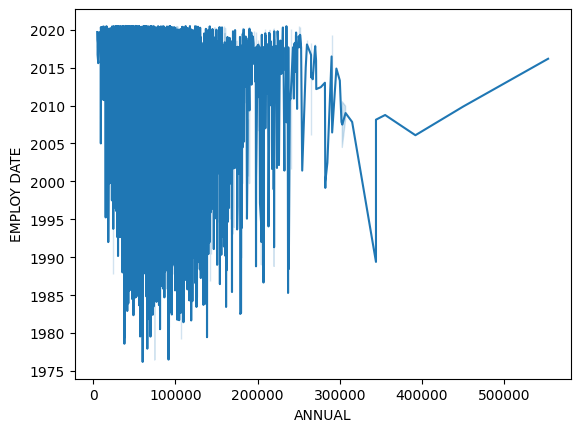

In [ ]:
sns.lineplot(x='ANNUAL',y='EMPLOY DATE', data=df)

#### Most roles or departments have salaries that fall between 70,000 and 200,000. However, there are certain roles where salaries have shown a clear upward trend over time from 2010 to 2020.

## Task 2:
### Data Analysis and data preprocessing
##### In this section, I am conducting data analysis while simultaneously preparing the data for machine learning algorithms. This involves carefully exploring and transforming the data to ensure it is clean, well-structured, and ready for model training.


In [ ]:

df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'], errors='coerce')

df.head(1)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search,Total_weekly_income
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN,2202.8835


#### Dropping all those column which not plays an important role in data modelling

In [ ]:


df.drop(['AGENCY NAME','LAST NAME', 'FIRST NAME',	'MI'], axis=1, inplace=True)

In [ ]:
df.head(1)

,AGENCY,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,MONTHLY,ANNUAL,STATE NUMBER,Total_weekly_income
0,241,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,9545.82,114549.84,127717,2202.8835


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
AGENCY,0
CLASS CODE,0
CLASS TITLE,0
ETHNICITY,0
GENDER,0
STATUS,0
EMPLOY DATE,0
MONTHLY,0
ANNUAL,0
STATE NUMBER,0


##### Since some columns have over 90% missing values, it is more efficient to drop these columns. Retaining them would not provide significant insights or value to the analysis, and removing them helps simplify the dataset, reducing noise and improving the overall quality of the data for machine learning.

In [ ]:

df.drop(['duplicated', 'multiple_full_time_jobs','combined_multiple_jobs', 'summed_annual_salary','hide_from_search'],axis=1,inplace=True)


In [ ]:
import datetime
from datetime import datetime
df['DAYS_SINCE_EMPLOYMENT'] = (datetime.now() - df['EMPLOY DATE']).dt.days
df.head(1)

,AGENCY,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,MONTHLY,ANNUAL,STATE NUMBER,Total_weekly_income,DAYS_SINCE_EMPLOYMENT
0,241,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,9545.82,114549.84,127717,2202.8835,13403


In [ ]:
# drop original date
df.drop(['EMPLOY DATE'],axis=1,inplace=True)

In [ ]:
df.describe()

,AGENCY,MONTHLY,ANNUAL,STATE NUMBER,Total_weekly_income,DAYS_SINCE_EMPLOYMENT
count,149481.000000,149481.000000,149481.000000,1.494810e+05,149481.000000,149481.000000
mean,545.736288,4226.184248,50714.210973,5.651930e+05,10.454901,3941.207371
std,139.057691,2093.111691,25117.340292,4.786212e+05,123.100045,2482.435553
min,101.000000,50.000000,600.000000,1.000000e+00,0.000000,-17848.000000
25%,529.000000,3019.840000,36238.080000,1.133340e+05,0.000000,2157.000000
50%,530.000000,3720.170000,44642.040000,3.463730e+05,0.000000,2941.000000
75%,696.000000,4865.810000,58389.720000,1.100500e+06,0.000000,5062.000000
max,930.000000,46125.000000,553500.000000,1.271604e+06,2355.769600,17956.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGENCY                 149481 non-null  int64  
 1   CLASS CODE             149481 non-null  object 
 2   CLASS TITLE            149481 non-null  object 
 3   ETHNICITY              149481 non-null  object 
 4   GENDER                 149481 non-null  object 
 5   STATUS                 149481 non-null  object 
 6   MONTHLY                149481 non-null  float64
 7   ANNUAL                 149481 non-null  float64
 8   STATE NUMBER           149481 non-null  int64  
 9   Total_weekly_income    149481 non-null  float64
 10  DAYS_SINCE_EMPLOYMENT  149481 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 12.5+ MB


In [ ]:
df['AGENCY'].value_counts()

,count
AGENCY,
529,36667
696,35926
601,13099
530,12588
405,10097
...,...
364,7
481,5
213,4


##### the variable "Agency" is classified as a categorical value. The agency numbers serve as unique identifiers; they do not imply a numeric scale or any logical ordering. To capture unique patterns associated with each agency without imposing any numerical relationships, we will employ one-hot encoding. This technique allows us to treat the "Agency" variable as categorical, ensuring that each category is represented independently.

 Similarly, we will apply one-hot encoding to the variables "state number" and "class code," as both of these are also categorical in nature. By using one-hot encoding for these variables, we can effectively analyze and learn from the unique patterns they present without assuming any intrinsic order or numerical significance.



In [ ]:
df = pd.get_dummies(df, columns=['AGENCY'], drop_first=True)
df.head(1)

,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,MONTHLY,ANNUAL,STATE NUMBER,Total_weekly_income,DAYS_SINCE_EMPLOYMENT,...,AGENCY_701,AGENCY_771,AGENCY_772,AGENCY_781,AGENCY_802,AGENCY_808,AGENCY_809,AGENCY_813,AGENCY_907,AGENCY_930
0,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,9545.82,114549.84,127717,2202.8835,13403,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['STATE NUMBER']



,STATE NUMBER
0,127717
1,127717
2,59115
3,59115
4,165030
...,...
149476,770781
149477,847431
149478,34266
149479,123490


In [ ]:
df['CLASS CODE'].value_counts()

,count
CLASS CODE,
4504,9267
4505,7895
4503,4718
5622,3646
5121,3307
...,...
U101,1
U104,1
E176,1


In [ ]:

class_code_dummies = pd.get_dummies(df['CLASS CODE'], prefix='CLASS_CODE', drop_first=True)


df = pd.concat([df, class_code_dummies], axis=1)


df = df.drop('CLASS CODE', axis=1)

##### we will utilize label encoding for the following categorical variables: Class Title, Ethnicity, Gender, and Status. Label encoding is a technique that converts categorical values into numerical format by assigning each unique category a distinct integer label.

In [ ]:
df['CLASS TITLE'].value_counts()

,count
CLASS TITLE,
CORREC OFFICER IV,9267
CORREC OFFICER V,7895
CORREC OFFCR III,4718
TEXAS WORKS ADVISOR II,3646
DIRECT SUPPORT PROFESSIONAL I,3307
...,...
"CHAIR,PARDONS AND PAROLES",1
STATISTICIAN II,1
EX DIRECTOR TDCJ,1


In [ ]:


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ['CLASS TITLE','ETHNICITY', 'GENDER','STATUS']:
    df[col]=le.fit_transform(df[col])

In [ ]:
df['ETHNICITY'].value_counts()

,count
ETHNICITY,
WHITE,67142
HISPANIC,40585
BLACK,35853
ASIAN,4268
OTHER,921
AM INDIAN,712


In [ ]:
df['STATUS'].value_counts()

,count
STATUS,
CRF - CLASSIFIED REGULAR FULL-TIME,142502
URF - UNCLASSIFIED REGULAR FULL-TIME,2363
CRP - CLASSIFIED REGULAR PART-TIME,1531
CTF - CLASSIFIED TEMPORARY FULL-TIME,1096
URP - UNCLASSIFIED REGULAR PART-TIME,950
ERF - EXEMPT REGULAR FULL-TIME,923
CTP - CLASSIFIED TEMPORARY PART-TIME,81
UTP - UNCLASSIFIED TEMPORARY PART-TIME,21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME,12


##### Now, we will analyze the numerical values in our dataset by applying Min-Max Scaling to specific features. This technique transforms the data into a fixed range, typically between 0 and 1, while maintaining the relationships between the values.

By utilizing Min-Max Scaling, we ensure that all numerical features are on the same scale, which is crucial for many machine learning algorithms that are sensitive to the scale of the input data. This approach helps improve model performance and convergence during training.



In [ ]:



from sklearn.preprocessing import MinMaxScaler
columns=['Total_weekly_income','DAYS_SINCE_EMPLOYMENT','MONTHLY']
scaler=MinMaxScaler()
for col in columns:
    df[col]=scaler.fit_transform(df[[col]])


### Task 2: Predicting the model:

In [ ]:
X=df.drop('ANNUAL',axis=1)
y=df['ANNUAL']

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


### 2.1 Linear Regression

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)
y_pred



array([22275.23999619, 36310.92014125, 79132.55976092, ...,
       40644.47996167, 44642.04000807, 28536.00008655])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.913909613339304e-08
R-squared: 0.9999999999999999


### 2.2 Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:

y_pred=dt.predict(X_test)
y_pred

array([22275.24   , 36310.91984, 79132.56   , ..., 40643.28   ,
       44642.04   , 28536.     ])

In [ ]:
r2_score(y_test,y_pred)
mean_squared_error(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.913909613339304e-08
R-squared: 0.9999999999999999


### 2.3 Random Forest Regression

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# y pred
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)
mean_squared_error(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.913909613339304e-08
R-squared: 0.9999999999999999


The performance metrics of three machine learning models—Linear Regression, Random Forest, and Decision Tree Regression—demonstrate nearly identical and highly accurate results:

**Mean Squared Error (MSE): 3.913909613339304e-08**
**R-squared (R²):            0.99999999999999**
These metrics indicate the following:

Mean Squared Error (MSE) is exceptionally low across all models, showing minimal differences between predicted and actual values, thus suggesting extremely precise predictions.
R-squared (R²) is nearly perfect at
1.0
1.0, meaning that the models explain almost all of the variance in the data, indicating an almost perfect fit.